In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
This notebook contains code for drawing face-detected and random samples from a video, 
annotating on face/no face, calculating precision, recall, and F-score, 
and visualizing the scores across detectors, groups, and videos.
"""
import os
import sys
import subprocess
import ntpath

from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import collections  as mc

print('Importing FaceDetector...')
from config import *
from detector import FaceDetector
from sample_processing import (format_num, create_sample_json, annotate_sample, run_detector_on_sample,
                               incorporate_openpose_output, calc_prf, display_prf, display_prf2)

!which python # should be /home/users/agrawalk/miniconda2/envs/headcam/bin/python

Importing FaceDetector...
/home/users/agrawalk/miniconda2/envs/headcam/bin/python


In [4]:
#1. Extract frames with ffmpeg

#TODO: make nicer, parametrized sbatch wrapper function in python
cmd = ('sbatch -p normal,hns -t 2:00:00 '
       '--mail-type=FAIL --mail-user=agrawalk@stanford.edu '
       '--wrap="python extract_frames.py {}"')

for vid_path in NEW_VID_PATHS:
    print(ntpath.basename(vid_path))
    p = subprocess.Popen(cmd.format(vid_path), shell=True, 
                         stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print(p.communicate())

2013-04-17-part1.AVI
(b'Submitted batch job 43957754\n', b'')
2013-07-06-part4.AVI
(b'Submitted batch job 43957755\n', b'')
072713-1.AVI
(b'Submitted batch job 43957756\n', b'')
092513-2.AVI
(b'Submitted batch job 43957757\n', b'')
120213-2.AVI
(b'Submitted batch job 43957758\n', b'')
012114-3.AVI
(b'Submitted batch job 43957759\n', b'')
032114-1.AVI
(b'Submitted batch job 43957760\n', b'')
053014-1.AVI
(b'Submitted batch job 43957761\n', b'')
072014-1.AVI
(b'Submitted batch job 43957762\n', b'')
092014-1.AVI
(b'Submitted batch job 43957763\n', b'')
112214-2.AVI
(b'Submitted batch job 43957764\n', b'')
012315-2.AVI
(b'Submitted batch job 43957765\n', b'')
040415-2.AVI
(b'Submitted batch job 43957766\n', b'')


In [ ]:
!squeue -u $USER

In [ ]:
#2. Run MTCNN on 10000 frames of each video
#TODO: add case to check if output json exists, and ask for confirmation to overwrite

cmd = ('sbatch -p normal,hns -c 8 -t 1:30:00 '
       '--mail-type=FAIL --mail-user=agrawalk@stanford.edu '
       '--wrap="python detect_faces_simple.py {0} {1}"')
                      
for frame_dir in FRAME_DIRS:
    p = subprocess.Popen(cmd.format(frame_dir, MASTER_JSON_PATH), shell=True, 
                         stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print(p.communicate())

In [ ]:
#3. select a random sample of 200 face-detected, 200 random frames from each video in the dataframe
#e.g. if 6 videos in JSON, creates a sample dataframe of size (200 + 200)*6 = 2400 frames
#TODO: add case to check if output json exists, and ask for confirmation to overwrite

#This is commented out so I don't accidentally run it.
# create_sample_json(MASTER_JSON_PATH, SAMPLE_JSON_PATH, sample_size=200)

In [ ]:
#4a. run + add detections for additional detectors to sample dataframe.

for det_name in ['pcn']:
    run_detector_on_sample(det_name, OUTPUT, SAMPLE_JSON_PATH)

In [ ]:
df = pd.read_json(SAMPLE_JSON_PATH)
df.head(n=20) #Ensure proper changes happened

In [ ]:
#4b. Hand-annotate for face (y/n) on the sample. Save annotations to dataframe.
#TODO: add case to check if annotation column exists, and ask for confirmation to overwrite
annotate_frames(OUTPUT, SAMPLE_JSON_PATH)

In [18]:
NEW_VID_PATHS

['/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-12-part1sortafixed.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-12-part2.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-12-part3.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-15-part1.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-15-part2.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-15-part3sortafixed.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-19-part1.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-19-part2.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-19-part3.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-22-part1sortafixed.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-22-part2.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-05-22-part3.AVI',
 '/scratch/groups/mcfrank/Home_Headcam/Samcam/Videos/2013-

In [20]:
len("""(b'Submitted batch job 44695180\n', b'')
(b'Submitted batch job 44695181\n', b'')
(b'Submitted batch job 44695182\n', b'')
(b'Submitted batch job 44695183\n', b'')
(b'Submitted batch job 44695184\n', b'')
(b'Submitted batch job 44695185\n', b'')
(b'Submitted batch job 44695186\n', b'')
(b'Submitted batch job 44695187\n', b'')
(b'Submitted batch job 44695188\n', b'')
(b'Submitted batch job 44695189\n', b'')
(b'Submitted batch job 44695191\n', b'')
(b'Submitted batch job 44695192\n', b'')
(b'Submitted batch job 44695193\n', b'')
(b'Submitted batch job 44695194\n', b'')
(b'Submitted batch job 44695196\n', b'')
(b'Submitted batch job 44695197\n', b'')
(b'Submitted batch job 44695198\n', b'')
(b'Submitted batch job 44695199\n', b'')
(b'Submitted batch job 44695200\n', b'')
(b'Submitted batch job 44695201\n', b'')
(b'Submitted batch job 44695203\n', b'')
(b'Submitted batch job 44695204\n', b'')
(b'Submitted batch job 44695205\n', b'')
(b'Submitted batch job 44695206\n', b'')
(b'Submitted batch job 44695207\n', b'')
(b'Submitted batch job 44695208\n', b'')
(b'Submitted batch job 44695209\n', b'')
(b'Submitted batch job 44695210\n', b'')
(b'Submitted batch job 44695211\n', b'')
(b'Submitted batch job 44695212\n', b'')
(b'Submitted batch job 44695213\n', b'')
(b'Submitted batch job 44695214\n', b'')
(b'Submitted batch job 44695216\n', b'')
(b'Submitted batch job 44695217\n', b'')
(b'Submitted batch job 44695218\n', b'')
(b'Submitted batch job 44695219\n', b'')
(b'Submitted batch job 44695220\n', b'')
(b'Submitted batch job 44695221\n', b'')
(b'Submitted batch job 44695222\n', b'')
(b'Submitted batch job 44695223\n', b'')
(b'Submitted batch job 44695224\n', b'')
(b'Submitted batch job 44695225\n', b'')
(b'Submitted batch job 44695226\n', b'')
(b'Submitted batch job 44695227\n', b'')
(b'Submitted batch job 44695228\n', b'')
(b'Submitted batch job 44695229\n', b'')
(b'Submitted batch job 44695230\n', b'')
(b'Submitted batch job 44695231\n', b'')
(b'Submitted batch job 44695232\n', b'')
(b'Submitted batch job 44695233\n', b'')""".splitlines())

100

In [19]:
#5a. Run openpose on videos

#save json w/ pose keypoints
cmd = ('sbatch -p gpu --gres gpu:1 -t 5:00:00 --mem 8G '
       '--mail-type=FAIL --mail-user=agrawalk@stanford.edu '
       '--wrap="singularity exec --nv $SINGULARITY_CACHEDIR/openpose-latest.img bash -c '
       '\'cd /openpose-master && ./build/examples/openpose/openpose.bin '
       '--no_display true '
       '--render_pose 0 '
       '--video {0} '
       '--keypoint_scale 3 '
       '--frame_rotate 180 '
       '--face ' # maybe don't want this
       '--hand ' # probably don't want this
       '--write_keypoint_json {1}\'"')

#save video w/pose info overlaid
cmd_pose = ('sbatch -p gpu --gres gpu:1 -t 5:00:00 --mem 8G '
            '--mail-type=FAIL --mail-user=agrawalk@stanford.edu '
            '--wrap="singularity exec --nv $SINGULARITY_CACHEDIR/openpose-latest.img bash -c '
            '\'cd /openpose-master && ./build/examples/openpose/openpose.bin '
            '--video {0} ' 
            '--write_video test.avi '
            '--frame_rotate 180 '
            '--face ' # maybe don't want this
            '--hand \'"') # probably don't want this

#Run from [100:] once the job count has gone down
for vid_path in NEW_VID_PATHS[100:]:
    openpose_vid_output = os.path.join(OPENPOSE_OUTPUT, ntpath.basename(vid_path)[:-4])
    #TODO: add case to check if output dir exists, and ask for confirmation to overwrite
    p = subprocess.Popen(cmd.format(vid_path, openpose_vid_output), shell=True, 
                             stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print(p.communicate()) #Output of job submission command

(b'Submitted batch job 44695180\n', b'')
(b'Submitted batch job 44695181\n', b'')
(b'Submitted batch job 44695182\n', b'')
(b'Submitted batch job 44695183\n', b'')
(b'Submitted batch job 44695184\n', b'')
(b'Submitted batch job 44695185\n', b'')
(b'Submitted batch job 44695186\n', b'')
(b'Submitted batch job 44695187\n', b'')
(b'Submitted batch job 44695188\n', b'')
(b'Submitted batch job 44695189\n', b'')
(b'Submitted batch job 44695191\n', b'')
(b'Submitted batch job 44695192\n', b'')
(b'Submitted batch job 44695193\n', b'')
(b'Submitted batch job 44695194\n', b'')
(b'Submitted batch job 44695196\n', b'')
(b'Submitted batch job 44695197\n', b'')
(b'Submitted batch job 44695198\n', b'')
(b'Submitted batch job 44695199\n', b'')
(b'Submitted batch job 44695200\n', b'')
(b'Submitted batch job 44695201\n', b'')
(b'Submitted batch job 44695203\n', b'')
(b'Submitted batch job 44695204\n', b'')
(b'Submitted batch job 44695205\n', b'')
(b'Submitted batch job 44695206\n', b'')
(b'Submitted bat

In [ ]:
vid_path = '/scratch/users/agrawalk/testvideos/061713-1.AVI'
openpose_vid_output = os.path.join(OPENPOSE_OUTPUT, ntpath.basename(vid_path)[:-4])
p = subprocess.Popen(cmd.format(vid_path, openpose_vid_output), shell=True, 
                             stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(p.communicate()) #Output of job submission command

In [ ]:
#5b. add openpose data to the dataframe.
#TODO: add case to check if openpose column exists, and ask for confirmation to overwrite
#TODO: in this function, create the calculated columns 'face_openpose' and 'face_openpose_body'
incorporate_openpose_output(SAMPLE_JSON_PATH, OPENPOSE_DIR)

In [ ]:
display_prf(SAMPLE_JSON_PATH)

In [ ]:
display_prf2(SAMPLE_JSON_PATH)

In [ ]:
#6. Visualize detector scores

df = pd.read_json('gold_set_sample.json')
df.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#TODO: start using the below:
#from sklearn.metrics import classification_report
#print(classification_report(y_test,predictions))

In [ ]:
X = df.filter(items=[f'face_{det}' for det in ['openpose']])
Y = df['face_present']
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.30, random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
print(len(df[df.index >= 1200]), len(df[df.index < 1200])) #should be 1200 for each
groups = {'random' : df[df.index < 1200], 'face' : df[df.index >= 1200]}

#TODO: dict of dicts is too complicated and doesn't support nice slicing ops,
#switch to using multidimensional array as "map" (where i know that a certain index corresponds to a detector)
#TODO: move this code to helper functions, once polished
#TODO: alternatively, calculate the prf stuff once, save as a json, etc.

avg_metrics = defaultdict(lambda: defaultdict(list))
vid_metrics = defaultdict(lambda: defaultdict(list))
metrics = ['p', 'r', 'f']
det_names = ['mtcnn', 'vj', 'openpose', 'openpose_body', 'pcn']

#Get metrics for each detector
for group in groups:
    for det in det_names:
        cut = groups[group] #slice by face/random
        
        #this is p/r/f for a given det/group
        prf = calc_prf(cut, det) 
        
        #each element is p/r/f for a given det/group/vid
        prf_vids = [calc_prf(cut[cut['vid_name'] == vid_name], det) for vid_name in VID_NAMES] 
        
        for i, metric in enumerate(metrics):
            avg_metrics[metric][det].append(prf[i])
            vid_metrics[metric][det].append([x[i] for x in prf_vids])

print(avg_metrics)
print(vid_metrics)
        

In [ ]:
#Plot metrics
#TODO: move this code to helper functions, once polished

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.15
opacity = 0.8

colors = [f'C{n}' for n in range(10)]

for j, metric in enumerate(metrics):
    plt.figure(j)
    
    #Bar chart plotting
    for i, det in enumerate(det_names):
        x = index + i*bar_width
        plt.bar(x, avg_metrics[metric][det], bar_width,
                alpha=opacity,
                color=colors[i],
                label=det)

    #Line chart plotting
    for i in range(len(VID_NAMES)):
        for k in range(2): #splitting by face/random
            #plot the scores for a given a metric, group, and video across detectors.
            metric_y = [vid_metrics[metric][det][k][i] for det in vid_metrics[metric]]
            metric_x = [index + i*bar_width for i in range(len(det_names))]
            plt.plot(metric_x, metric_y, color='C4', marker='o')
        
    plt.xlabel('Group')
    plt.ylabel('Scores')
    
    metric_print = {'p': 'Precision', 'r': 'Recall', 'f': 'F-score'}
    plt.title(metric_print[metric])
    
    plt.xticks(index + bar_width, ('random', 'face'))
    plt.legend()
    
plt.show()

In [17]:
df = pd.read_json('gold_set_sample.json')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 999
Data columns (total 15 columns):
vid_name                2400 non-null object
frame                   2400 non-null int64
face_mtcnn              2400 non-null bool
bb_mtcnn                2400 non-null object
bb_vj                   2400 non-null object
face_vj                 2400 non-null bool
pose_keypoints          2400 non-null object
face_keypoints          2400 non-null object
hand_left_keypoints     2400 non-null object
hand_right_keypoints    2400 non-null object
face_present            2400 non-null int64
face_openpose           2400 non-null bool
face_openpose_body      2400 non-null bool
bb_pcn                  2400 non-null object
face_pcn                2400 non-null bool
dtypes: bool(5), int64(2), object(8)
memory usage: 218.0+ KB


In [19]:
openpose_true = df[df['face_present'] == df['face_openpose']]
openpose_false = df[df['face_present'] != df['face_openpose']]


openpose_tp = openpose_true[openpose_true['face_openpose'] == True]
openpose_tn = openpose_true[openpose_true['face_openpose'] == False]

openpose_fp = openpose_false[openpose_false['face_openpose'] == True]
openpose_fn = openpose_false[openpose_false['face_openpose'] == False]

print(len(openpose_tp))
print(len(openpose_tn))
print(len(openpose_fp))
print(len(openpose_fn))

1017
1195
97
91


In [24]:
openpose_tp[-30:]

vid_name  frame  face_mtcnn                bb_mtcnn  \
790          061713-1   5826        True  [[269, 242, 198, 229]]   
791          061713-1  27822       False                      []   
794          061713-1   5842       False                      []   
795          061713-1  26721        True    [[345, 101, 74, 85]]   
798          061713-1  27892       False                      []   
803  2014-01-01-part2  15514       False                      []   
811  2014-01-01-part2   5861       False                      []   
820  2014-01-01-part2  19771       False                      []   
849  2014-01-01-part2   5821       False                      []   
85           053113-1  15397        True   [[162, 39, 143, 168]]   
851  2014-01-01-part2  24100       False                      []   
879  2014-01-01-part2  23257       False                      []   
886  2014-01-01-part2    868       False                      []   
889  2014-01-01-part2  23619       False                      []   
902  2014-01-01-part2   5624       False                      []   
905  2014-01-01-part2    731       False                      []   
915  2014-01-01-part2   2582       False                      []   
923  2014-01-01-part2  15502       False                      []   
924  2014-01-01-part2  22802       False                      []   
927  2014-01-01-part2  19833       False                      []   
928  2014-01-01-part2  22229       False                      []   
935  2014-01-01-part2  24091       False                      []   
939  2014-01-01-part2   5980       False                      []   
954  2014-01-01-part2   5349       False                      []   
967  2014-01-01-part2   4851       False                      []   
968  2014-01-01-part2    107       False                      []   
984  2014-01-01-part2  15669       False                      []   
994  2014-01-01-part2  23335       False                      []   
995  2014-01-01-part2  19767       False                      []   
999  2014-01-01-part2   5645       False                      []   

                     bb_vj  face_vj  \
790                     []    False   
791                     []    False   
794                     []    False   
795                     []    False   
798                     []    False   
803                     []    False   
811                     []    False   
820                     []    False   
849                     []    False   
85   [[161, 52, 143, 143]]     True   
851                     []    False   
879                     []    False   
886                     []    False   
889                     []    False   
902                     []    False   
905                     []    False   
915                     []    False   
923                     []    False   
924                     []    False   
927                     []    False   
928                     []    False   
935                     []    False   
939                     []    False   
954                     []    False   
967                     []    False   
968                     []    False   
984                     []    False   
994                     []    False   
995                     []    False   
999                     []    False   

                                        pose_keypoints  \
790  [[336.51, 309.146, 0.8245049999999999, 348.311...   
791  [[332.595, 346.962, 0.597231, 276.536, 425.233...   
794  [[260.887, 327.4, 0.814113, 233.446, 356.085, ...   
795  [[610.399, 190.432, 0.8406089999999999, 618.23...   
798  [[163.086, 211.303, 0.48673299999999997, 126.5...   
803  [[571.303, 49.5622, 0.600294, 567.402, 136.966...   
811  [[148.676, 95.229, 0.7202839999999999, 120.01,...   
820  [[340.438, 71.7635, 0.8078059999999999, 473.48...   
849  [[193.097, 117.403, 0.908334, 161.802, 129.077...   
85   [[203.434, 130.411, 0.746006, 203.445, 217.84,...   
851  [[296.047, 120.033, 0.855143, 348.273, 206.107...  

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


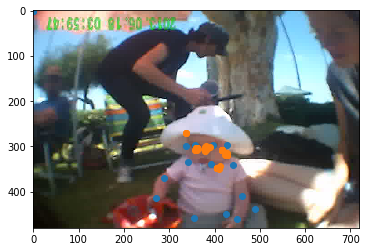

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


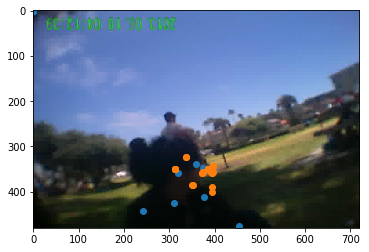

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


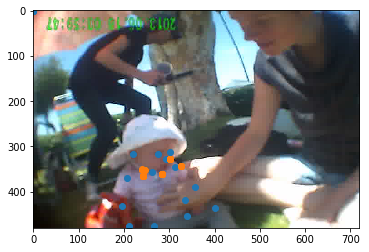

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


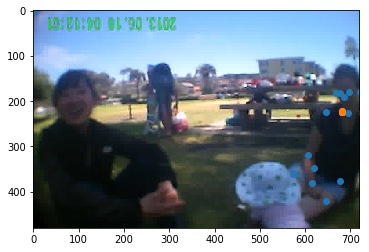

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


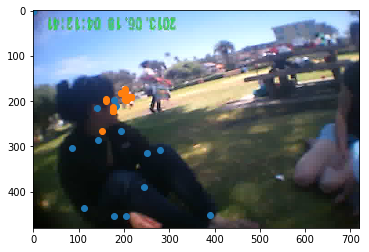

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


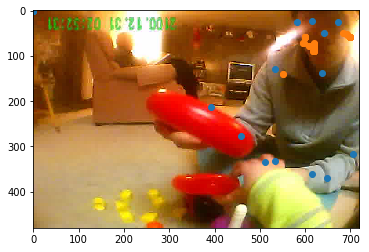

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


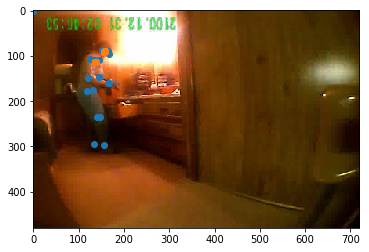

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


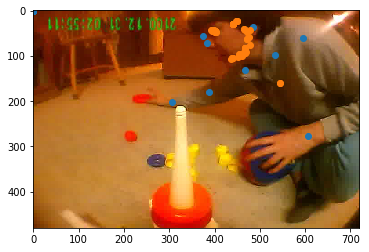

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


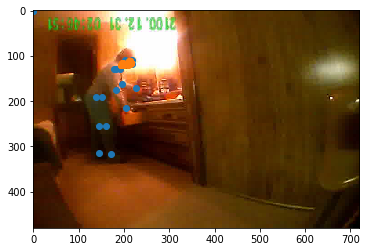

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


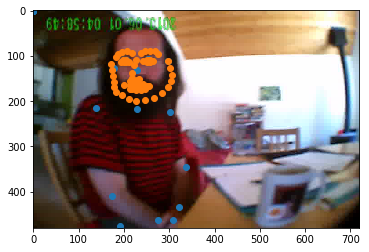

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


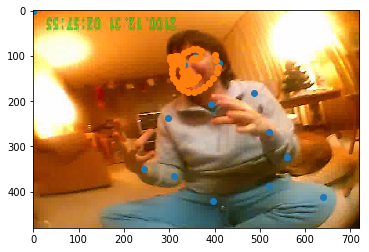

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


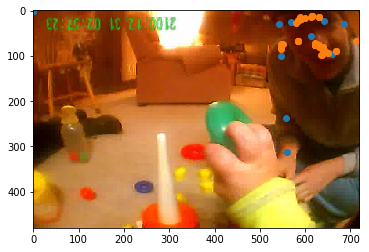

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


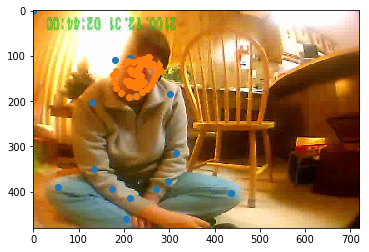

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


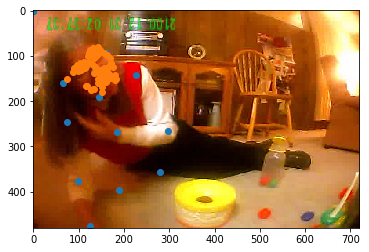

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


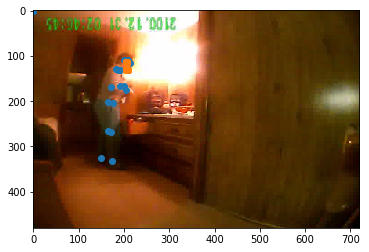

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


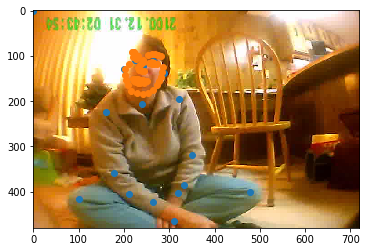

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


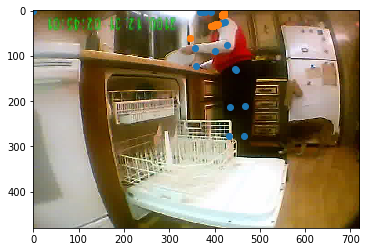

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


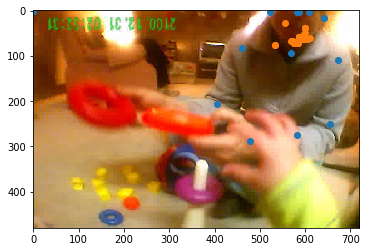

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


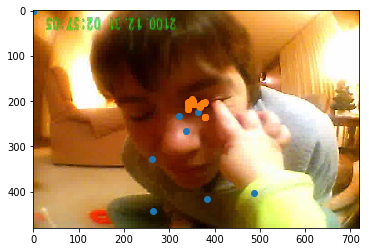

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


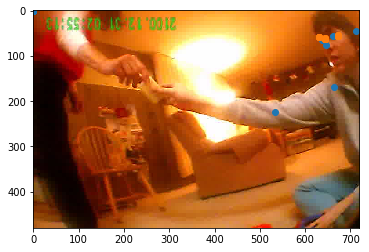

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


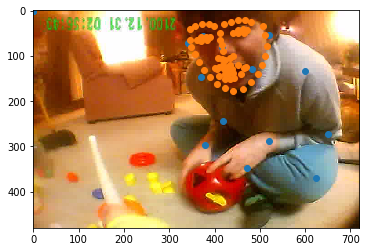

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


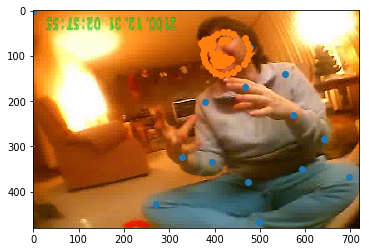

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


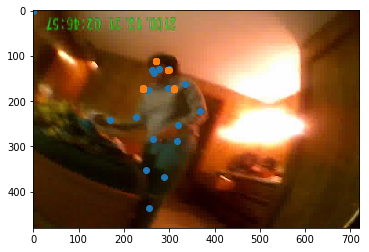

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


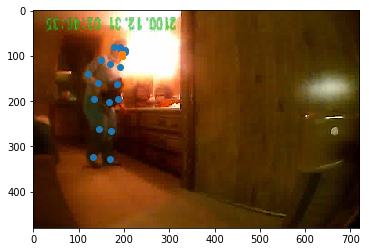

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


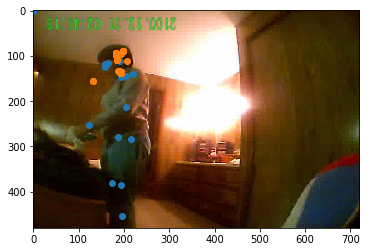

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


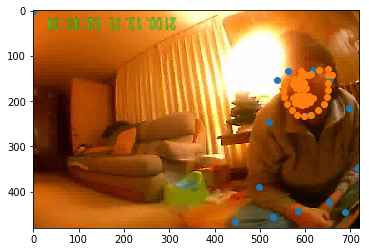

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


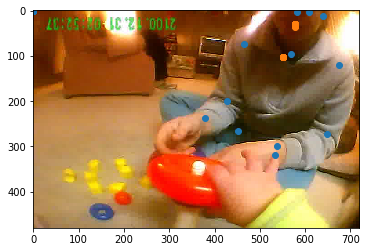

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


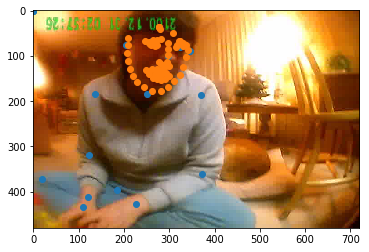

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


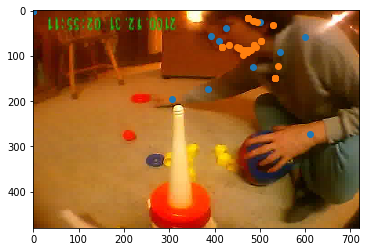

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


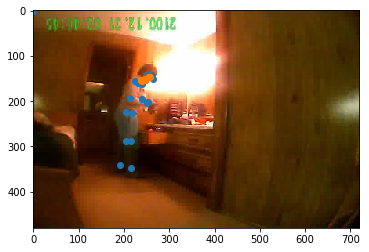

790    None
791    None
794    None
795    None
798    None
803    None
811    None
820    None
849    None
85     None
851    None
879    None
886    None
889    None
902    None
905    None
915    None
923    None
924    None
927    None
928    None
935    None
939    None
954    None
967    None
968    None
984    None
994    None
995    None
999    None
dtype: object

In [23]:
openpose_tp[-30:].apply(viz_op_keypoints, axis=1)

In [14]:
openpose_tp[2:3]
#copy the image
#

vid_name  frame  face_mtcnn            bb_mtcnn bb_vj  face_vj  \
1004  2014-06-18-part2  15141        True  [[460, 7, 70, 73]]    []    False   

                                         pose_keypoints  \
1004  [[438.251, 44.3217, 0.8628239999999999, 455.25...   

                                         face_keypoints  \
1004  [[418.635, 42.6672, 0.49158399999999997, 420.3...   

                                    hand_left_keypoints  \
1004  [[428.644, 170.853, 0.10020899999999999, 428.3...   

                                   hand_right_keypoints  face_present  \
1004  [[421.81, 164.446, 0.045016299999999995, 422.7...             1   

      face_openpose  face_openpose_body  \
1004           True                True   

                                                 bb_pcn  face_pcn  
1004  [[472.0, 22.0, 41.0, 18.7823832035, 0.99135828...      True

In [ ]:
openpose_fp.head()

In [ ]:
openpose_fp[:20].apply(viz_op_keypoints, axis=1)

In [ ]:
openpose_tn[:20].apply(viz_op_keypoints, axis=1)

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


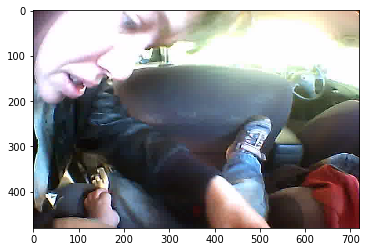

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


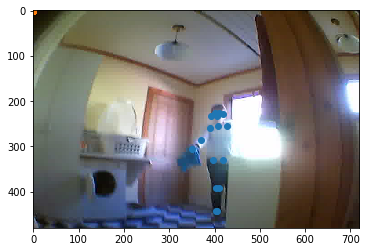

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


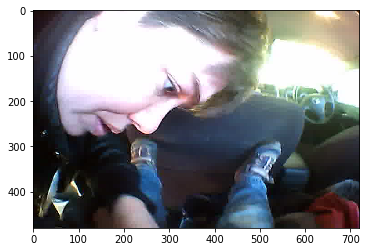

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


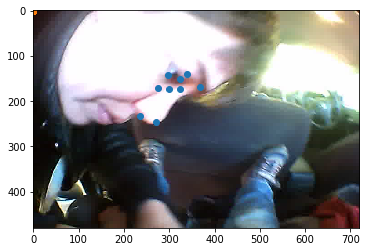

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


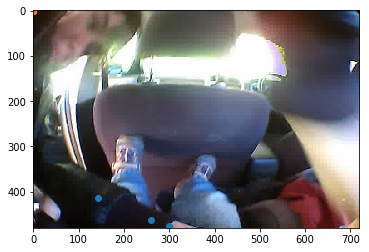

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


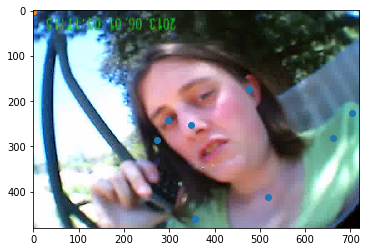

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


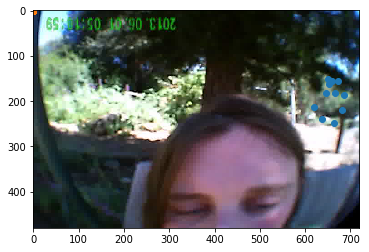

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


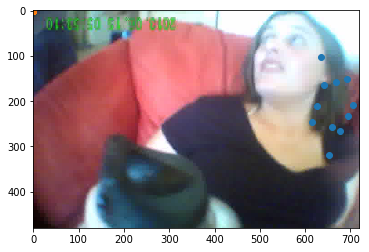

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


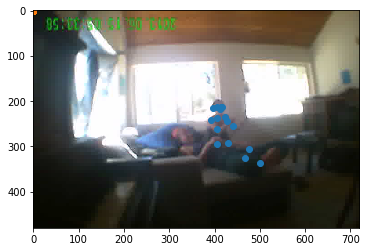

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


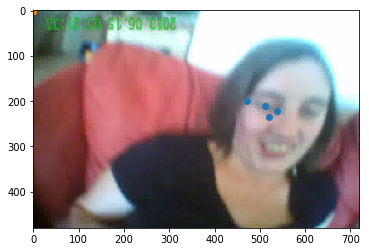

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


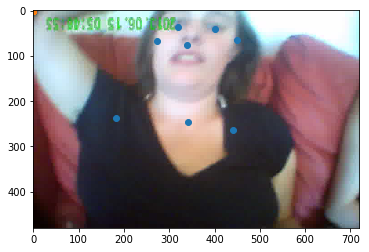

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


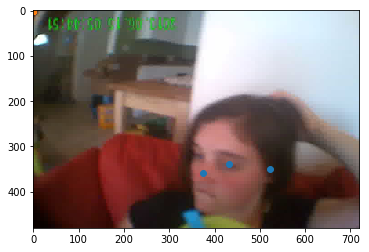

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


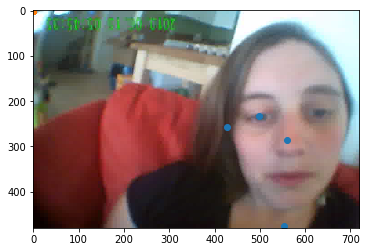

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


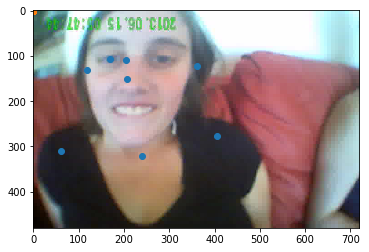

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


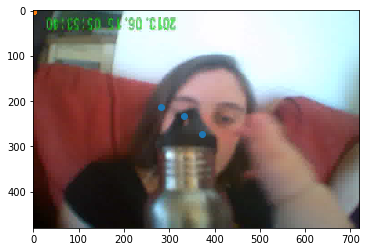

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


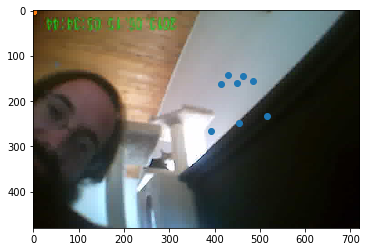

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


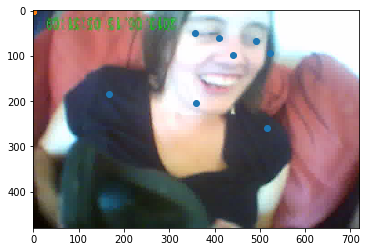

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


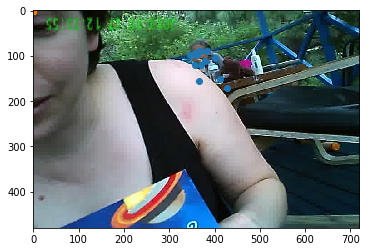

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


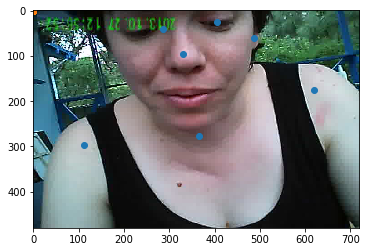

Index(['vid_name', 'frame', 'face_mtcnn', 'bb_mtcnn', 'bb_vj', 'face_vj',
       'pose_keypoints', 'face_keypoints', 'hand_left_keypoints',
       'hand_right_keypoints', 'face_present', 'face_openpose',
       'face_openpose_body', 'bb_pcn', 'face_pcn'],
      dtype='object')


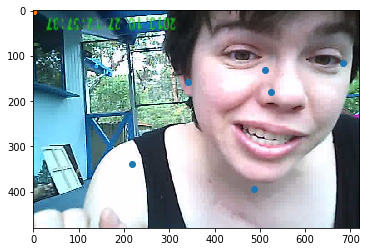

1002    None
1003    None
1084    None
1138    None
1197    None
1341    None
1388    None
1430    None
1450    None
1459    None
1489    None
1525    None
1537    None
1543    None
1561    None
1566    None
1586    None
1650    None
1663    None
1716    None
dtype: object

In [28]:
openpose_fn[:20].apply(viz_op_keypoints, axis=1)

In [ ]:
#7. Visualize frames which Openpose succeeds (True Positive) and MTCNN fails (False Positive/False Negative).

def openpose_not_mtcnn(row):
    return row['face_present'] == row['face_openpose'] and row['face_present'] != row['face_mtcnn']

op_not_mtcnn = df[df.apply(openpose_not_mtcnn, axis=1)]

mtcnn_fp = op_not_mtcnn[op_not_mtcnn['face_present'] == False] #but MTCNN returned True
mtcnn_fn = op_not_mtcnn[op_not_mtcnn['face_present'] == True] #but MTCNN returned False

print(f'Num False positives: {len(mtcnn_fp)}')
print(f'Num False negatives: {len(mtcnn_fn)}')

In [ ]:
def openpose_succeeds(row):
    return row['face_present'] == row['face_openpose']

op_succeeds = df[df.apply(openpose_succeeds, axis=1)]

In [ ]:
img_paths = [os.path.join(OUTPUT, f'{vid_name}_frames/image-{format_num(num)}.jpg')
                 for vid_name, num in zip(mtcnn_fp['vid_name'], mtcnn_fp['frame'])]
imgs = [plt.imread(path) for path in img_paths]

for img in imgs[:3]:
    plt.imshow(img)
    plt.show()

In [5]:
#return x and y arrays for a single frame

def get_op_xy(keypt_lists):
    x = []
    y = []
    for keypt in keypt_lists:
        x.append(keypt[0::3]) 
        y.append(keypt[1::3])
    if x == [] or y == []:
        return [], []
    
    return x[0], y[0]

def get_op_lines(x, y, pairings):
    lines = []
    print(f'length of x: {len(x)}')
    print(f'length of y: {len(y)}')

    for x1, y1 in zip(x, y):
        line = []
        for p1, p2 in pairings:
            print(p1, p2)
            line.append([(x[p1], y[p1]), (x[p2], y[p2])])
        lines.append(line)
    return lines

In [ ]:
face_pairings = [0,1,  1,2,  2,3,  3,4,  4,5,  5,6,  6,7,  7,8,  8,9,  9,10,  10,11,  11,12,  12,13,  13,14,  14,15,  15,16,  17,18,  18,19,  19,20, \
                 20,21,  22,23,  23,24,  24,25,  25,26,  27,28,  28,29,  29,30,  31,32,  32,33,  33,34,  34,35,  36,37,  37,38,  38,39,  39,40,  40,41, \
                 41,36,  42,43,  43,44,  44,45,  45,46,  46,47,  47,42,  48,49,  49,50,  50,51,  51,52,  52,53,  53,54,  54,55,  55,56,  56,57,  57,58, \
                 58,59,  59,48,  60,61,  61,62,  62,63,  63,64,  64,65,  65,66,  66,67,  67,60]
pose_pairings = [1,8,   1,2,   1,5,   2,3,   3,4,   5,6,   6,7,   8,9,   9,10,  10,11, 8,12,  12,13, 13,14,  1,0,   0,15, 15,17,  0,16, 16,18,   2,17,  5,18,   14,19,19,20,14,21, 11,22,22,23,11,24]
face_pairings = [(p1, p2) for (p1, p2) in zip(face_pairings[0::2], face_pairings[1::2])]
pose_pairings = [(p1, p2) for (p1, p2) in zip(pose_pairings[0::2], pose_pairings[1::2])]

print(face_pairings)
print(pose_pairings)

In [8]:
def viz_op_keypoints(row):
    colors = [f'C{n}' for n in range(10)]
    vid_name, num = row['vid_name'], row['frame']
    img_path = os.path.join(OUTPUT, '{0}_frames/image-{1}.jpg'.format(vid_name, format_num(num)))
    img = plt.imread(img_path)
    
    x_pose, y_pose = get_op_xy(row['pose_keypoints'])
    x_face, y_face = get_op_xy(row['face_keypoints'])
    
#     pose_lines = get_op_lines(x_pose, y_pose, pose_pairings)
#     face_lines = get_op_lines(x_face, y_face, face_pairings)
    
    plt.scatter(np.array(x_pose)*720/640, y_pose)
#     lc = mc.LineCollection(pose_lines, colors=[(1, 0, 0, 1)]*len(pose_lines), linewidths=10)
    plt.scatter(np.array(x_face)*720/640, y_face, c=colors[1])
#     lc = mc.LineCollection(face_lines, colors=[(0, 0, 1, 1)]*len(face_lines), linewidths=10)
    plt.imshow(img)
    plt.show()
    
def viz_mtcnn_keypoints(row):
    vid_name, num = row['vid_name'], row['frame']
    img_path = os.path.join(OUTPUT, '{0}_frames/image-{1}.jpg'.format(vid_name, format_num(num)))
    img = plt.imread(img_path)
    print(img.shape)
    

#     x_pose, y_pose = get_op_xy(row['pose_keypoints'])
#     x_face, y_face = get_op_xy(row['face_keypoints'])
    
#     pose_lines = get_op_lines(x_pose, y_pose, pose_pairings)
#     face_lines = get_op_lines(x_face, y_face, face_pairings)
    
#     plt.scatter(np.array(x_pose) + 40, y_pose)
#     lc = mc.LineCollection(pose_lines, colors=[(1, 0, 0, 1)]*len(pose_lines), linewidths=10)
#     plt.scatter(np.array(x_face) + 40, y_face, c=colors[1])
#     lc = mc.LineCollection(face_lines, colors=[(0, 0, 1, 1)]*len(face_lines), linewidths=10)
#     fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(img)
#     plt.imshow(img)
    for bb in row['bb_mtcnn']:
        x, y, w, h = bb
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    
# img_paths = [os.path.join(OUTPUT, '{0}_frames/image-{1}.jpg'.format(vid_name, format_num(num)))
#                  for vid_name, num in zip(mtcnn_fn['vid_name'], mtcnn_fn['frame'])][:3]
# imgs = [plt.imread(path) for path in img_paths]


# mtcnn_fn.apply(viz_op_keypoints, axis=1)

In [ ]:
mtcnn_fp.apply(viz_mtcnn_keypoints, axis=1)

In [ ]:
op_succeeds.head()

In [ ]:
op_succeeds.sample(100).apply(viz_op_keypoints, axis=1)

In [ ]:
max([max(x) for x in df['face_keypoints'].values if len(x) > 0])

In [1]:
!cp output/2014-06-18-part2_frames/image-15141.jpg ./test_imgs

In [9]:
#5a. Run openpose on videos

#save json w/ pose keypoints
cmd = ('sbatch -p gpu --gres gpu:1 -t 0:05:00 --mem 4G '
       '--mail-type=FAIL --mail-user=agrawalk@stanford.edu '
       '--wrap="singularity exec --nv $SINGULARITY_CACHEDIR/openpose-latest.img bash -c '
       '\'cd /openpose-master && ./build/examples/openpose/openpose.bin '
       '--no_display true '
       '--render_pose 0 '
       '--image_dir {0} '
       '--keypoint_scale 0 '
       '--face ' # maybe don't want this
       '--hand ' # probably don't want this
       '--write_keypoint_json {1}\'"')

openpose_test_input = os.path.join(SCRATCH, 'headcam-algo/test_imgs')
openpose_test_output = os.path.join(SCRATCH, 'headcam-algo/test_out2')
#TODO: add case to check if output dir exists, and ask for confirmation to overwrite
p = subprocess.Popen(cmd.format(openpose_test_input, openpose_test_output), shell=True, 
                         stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(p.communicate()) #Output of job submission command

(b'Submitted batch job 43446907\n', b'')


In [12]:
img.shape

(480, 720, 3)

[0.687522, 0.0924945, 0.880998, 0.716645, 0.179744, 0.7977869999999999, 0.665783, 0.207026, 0.7099869999999999, 0.683932, 0.40573299999999995, 0.278418, 0.674859, 0.33216399999999996, 0.41050000000000003, 0.769211, 0.144314, 0.693943, 0.8109369999999999, 0.250476, 0.44784399999999996, 0.7057, 0.294201, 0.464699, 0.7202029999999999, 0.452046, 0.399229, 0.720177, 0.631748, 0.34972899999999996, 0.731011, 0.814211, 0.269737, 0.794616, 0.438418, 0.468431, 0.776439, 0.6453519999999999, 0.374764, 0.736529, 0.8386929999999999, 0.210105, 0.6729700000000001, 0.0789665, 0.8722989999999999, 0.696615, 0.0733799, 0.893798, 0.66027, 0.103534, 0.803199, 0.718384, 0.0843696, 0.806925]


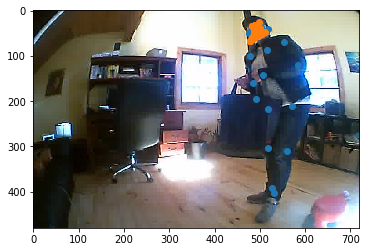

In [8]:
#Want to figure out what the correspondence of input size to output size is in Openpose...

img = plt.imread('test_imgs/image-15141.jpg')
pts = pd.read_json('test_out/image-15141_keypoints.json')
row = pts['people'][0]
print(row['pose_keypoints'])
x_pose, y_pose = get_op_xy([row['pose_keypoints']])
x_face, y_face = get_op_xy([row['face_keypoints']])

plt.scatter(np.array(x_pose)*img.shape[1], np.array(y_pose)*img.shape[0])
colors = [f'C{n}' for n in range(10)]
plt.scatter(np.array(x_face)*img.shape[1], np.array(y_face)*img.shape[0], c=colors[1])
plt.imshow(img)
plt.show()

In [16]:
pts = pd.read_json('test_out/image-15141_keypoints.json')
pts['people'][0].keys()

dict_keys(['pose_keypoints', 'face_keypoints', 'hand_left_keypoints', 'hand_right_keypoints'])

In [ ]:
#Results of tests:

#1. Running OP w/ videos (as done previously) (480 x 640):
# detections are off target (not multiple of sixteen)

#1. Running OP w/ single image frame (480 x 720):
# detections are on target

#1. Running OP w/ single image frame (480 x 640), --keypoint_scale 3 (normalize outputs to [0,1]):
# detections are on target

"""
x scaled up from 720 -> 720
y scaled up from 640 -> 720
"""

#The output size defaults to a multiple of 16. That is why the dimensions were misaligned.
# (see below copied from Openpose docs) 

"""
DEFINE_string(net_resolution, "-1x368", "Multiples of 16. If it is increased, 
the accuracy potentially increases. If it is decreased, the speed increases. For 
maximum speed-accuracy balance, it should keep the closest aspect ratio possible 
to the images or videos to be processed. Using -1 in any of the dimensions, OP 
will choose the optimal aspect ratio depending on the user's input value. E.g., 
the default -1x368 is equivalent to 656x368 in 16:9 resolutions, e.g., full HD 
(1980x1080) and HD (1280x720) resolutions.");

DEFINE_string(face_net_resolution, "368x368", "Multiples of 16 and squared. Analogous 
to net_resolution but applied to the face keypoint detector. 320x320 usually works 
fine while giving a substantial speed up when multiple faces on the image.");
"""